In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

C:\Users\Evanger\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data = pd.read_csv('fccVacancySurfaceData_0920.csv')

In [4]:
data[0:5]

,elem,model,a,cohesive-energy,c11,c12,bulk,shear,volume,bulk*volume,...,ln_spedt33,ln_spdst11,ln_spdst33,surface100,surface121,surface111,surface110,element,lattice,model.1
0,Ni,EAM_Dynamo_Mendelev_NiZr__MO_149104665840_002,3.518121,4.385509,1.541770,0.919364,1.126833,0.311203,43.544406,49.067255,...,-100.0,1.313183,-100,0.087720,0.094267,0.080135,0.098994,Ni,fcc,EAM_Dynamo_Mendelev_NiZr__MO_149104665840_002
1,Al,EAM_QuinticClampedSpline_Cai_Ye_AlCu__MO_24634...,4.028817,3.314777,0.504697,0.378839,0.420792,0.062929,65.393214,27.516949,...,-100.0,1.962596,-100,0.034192,0.036444,0.030711,0.038557,Al,fcc,EAM_QuinticClampedSpline_Cai_Ye_AlCu__MO_24634...
2,Cu,EAM_Dynamo_Cai_Ye_AlCu__MO_942551040047_002,3.614728,3.524568,1.050648,0.792582,0.878604,0.129033,47.230976,41.497326,...,-100.0,1.889494,-100,0.078080,0.082802,0.072924,0.084433,Cu,fcc,EAM_Dynamo_Cai_Ye_AlCu__MO_942551040047_002
3,Al,EAM_QuinticClampedSpline_Ercolessi_Adams_Al__M...,4.032083,3.360000,0.736016,0.388032,0.504027,0.173992,65.552364,33.040145,...,-100.0,1.760918,-100,0.058839,0.063310,0.054301,0.064670,Al,fcc,EAM_QuinticClampedSpline_Ercolessi_Adams_Al__M...
4,Al,EAM_QuinticHermiteSpline_Ercolessi_Adams_Al__M...,4.032082,3.360000,0.736103,0.388004,0.504037,0.174050,65.552343,33.040791,...,-100.0,1.760564,-100,0.058839,0.063310,0.054301,0.064670,Al,fcc,EAM_QuinticHermiteSpline_Ercolessi_Adams_Al__M...


In [27]:
data['lambda111a2'] = data['surface111'] * np.square(data['a'])
data['lambda110a2'] = data['surface110'] * np.square(data['a'])
data['lambda100a2'] = data['surface100'] * np.square(data['a'])

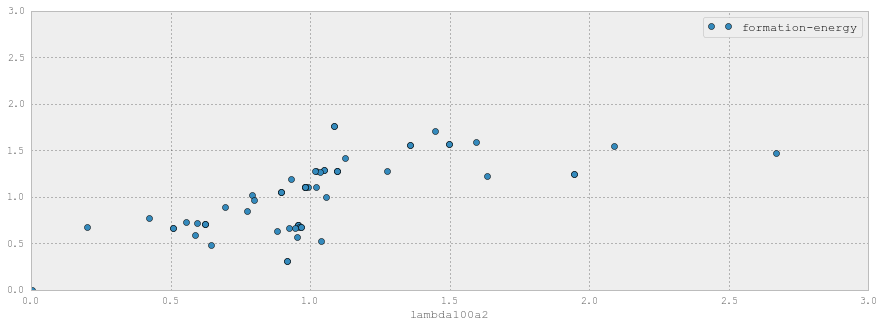

In [32]:
data.plot(x = 'lambda100a2', y = 'formation-energy', style = 'o', xlim = (0, 3), ylim = (0, 3))

In [22]:
from pandas.stats.api import ols
import statsmodels.api as sm

In [33]:
model = sm.OLS(data['formation-energy'], data['lambda100a2'])
# model = sm.OLS(data['formation-energy'], data[['lambda111a2', 'lambda110a2', 'lambda100a2']])
result = model.fit()
print(result.summary())
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       formation-energy   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     645.2
Date:                Mon, 26 Sep 2016   Prob (F-statistic):           3.90e-35
Time:                        16:02:52   Log-Likelihood:                -18.926
No. Observations:                  65   AIC:                             39.85
Df Residuals:                      64   BIC:                             42.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
lambda100a2     0.9368      0.037     25.400      

In [37]:
data[['elem', 'formation-energy']].sort(['formation-energy'])

C:\Users\Evanger\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,elem,formation-energy
22,Xe,0.003125
11,Pb,0.310290
12,Pb,0.312672
6,Al,0.483808
17,Al,0.524922
18,Ni,0.565731
14,Pb,0.592763
49,Al,0.634843
29,Al,0.660147
58,Al,0.660156


In [38]:
data.shape

(65, 46)